In [4]:
import pandas as pd
import numpy as np

# import viz   
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error

import wrangle

In [9]:
# Load your zillow dataset

df = pd.read_csv('zillow.csv')
df.head()

,Unnamed: 0,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips,taxvaluedollarcnt
0,0,0.0,0.0,NaN,NaN,NaN,6037.0,27516.0
1,1,0.0,0.0,NaN,NaN,NaN,6037.0,10.0
2,2,0.0,0.0,NaN,NaN,NaN,6037.0,10.0
3,3,0.0,0.0,NaN,NaN,174.21,6037.0,2108.0
4,4,2.0,4.0,3633.0,2005.0,6941.39,6037.0,296425.0


In [17]:
# Drop null values
new_df = df.dropna()
new_df.head()

,Unnamed: 0,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips,taxvaluedollarcnt
4,4,2.0,4.0,3633.0,2005.0,6941.39,6037.0,296425.0
6,6,4.0,3.0,1620.0,2011.0,10244.94,6037.0,847770.0
7,7,2.0,3.0,2077.0,1926.0,7924.68,6037.0,646760.0
11,11,0.0,0.0,1200.0,1972.0,91.60,6037.0,5328.0
14,14,0.0,0.0,171.0,1973.0,255.17,6037.0,6920.0


In [23]:
train, validate, test = wrangle.split_zillow_data(new_df)
train.shape, validate.shape, test.shape

((1198531, 8), (513657, 8), (428047, 8))

In [3]:
# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt 
# using only calculatedfinishedsqft.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X = train[['calculatedfinishedsquarefeet']]
y = train['taxvaluedollarcnt']

In [26]:
# create the object
lm = LinearRegression()
# fit the object
lm.fit(X, y)
# use the object
yhat = lm.predict(X)

In [27]:
yhat[:10]

array([306270.39980171, 390954.71935762, 514075.85385759, 533602.57802704,
       332785.63577917, 372250.17304794, 343679.49242107, 639046.88854204,
       409659.2656673 , 346968.20386014])

In [ ]:
# Plot the residuals for the linear regression model that you made.

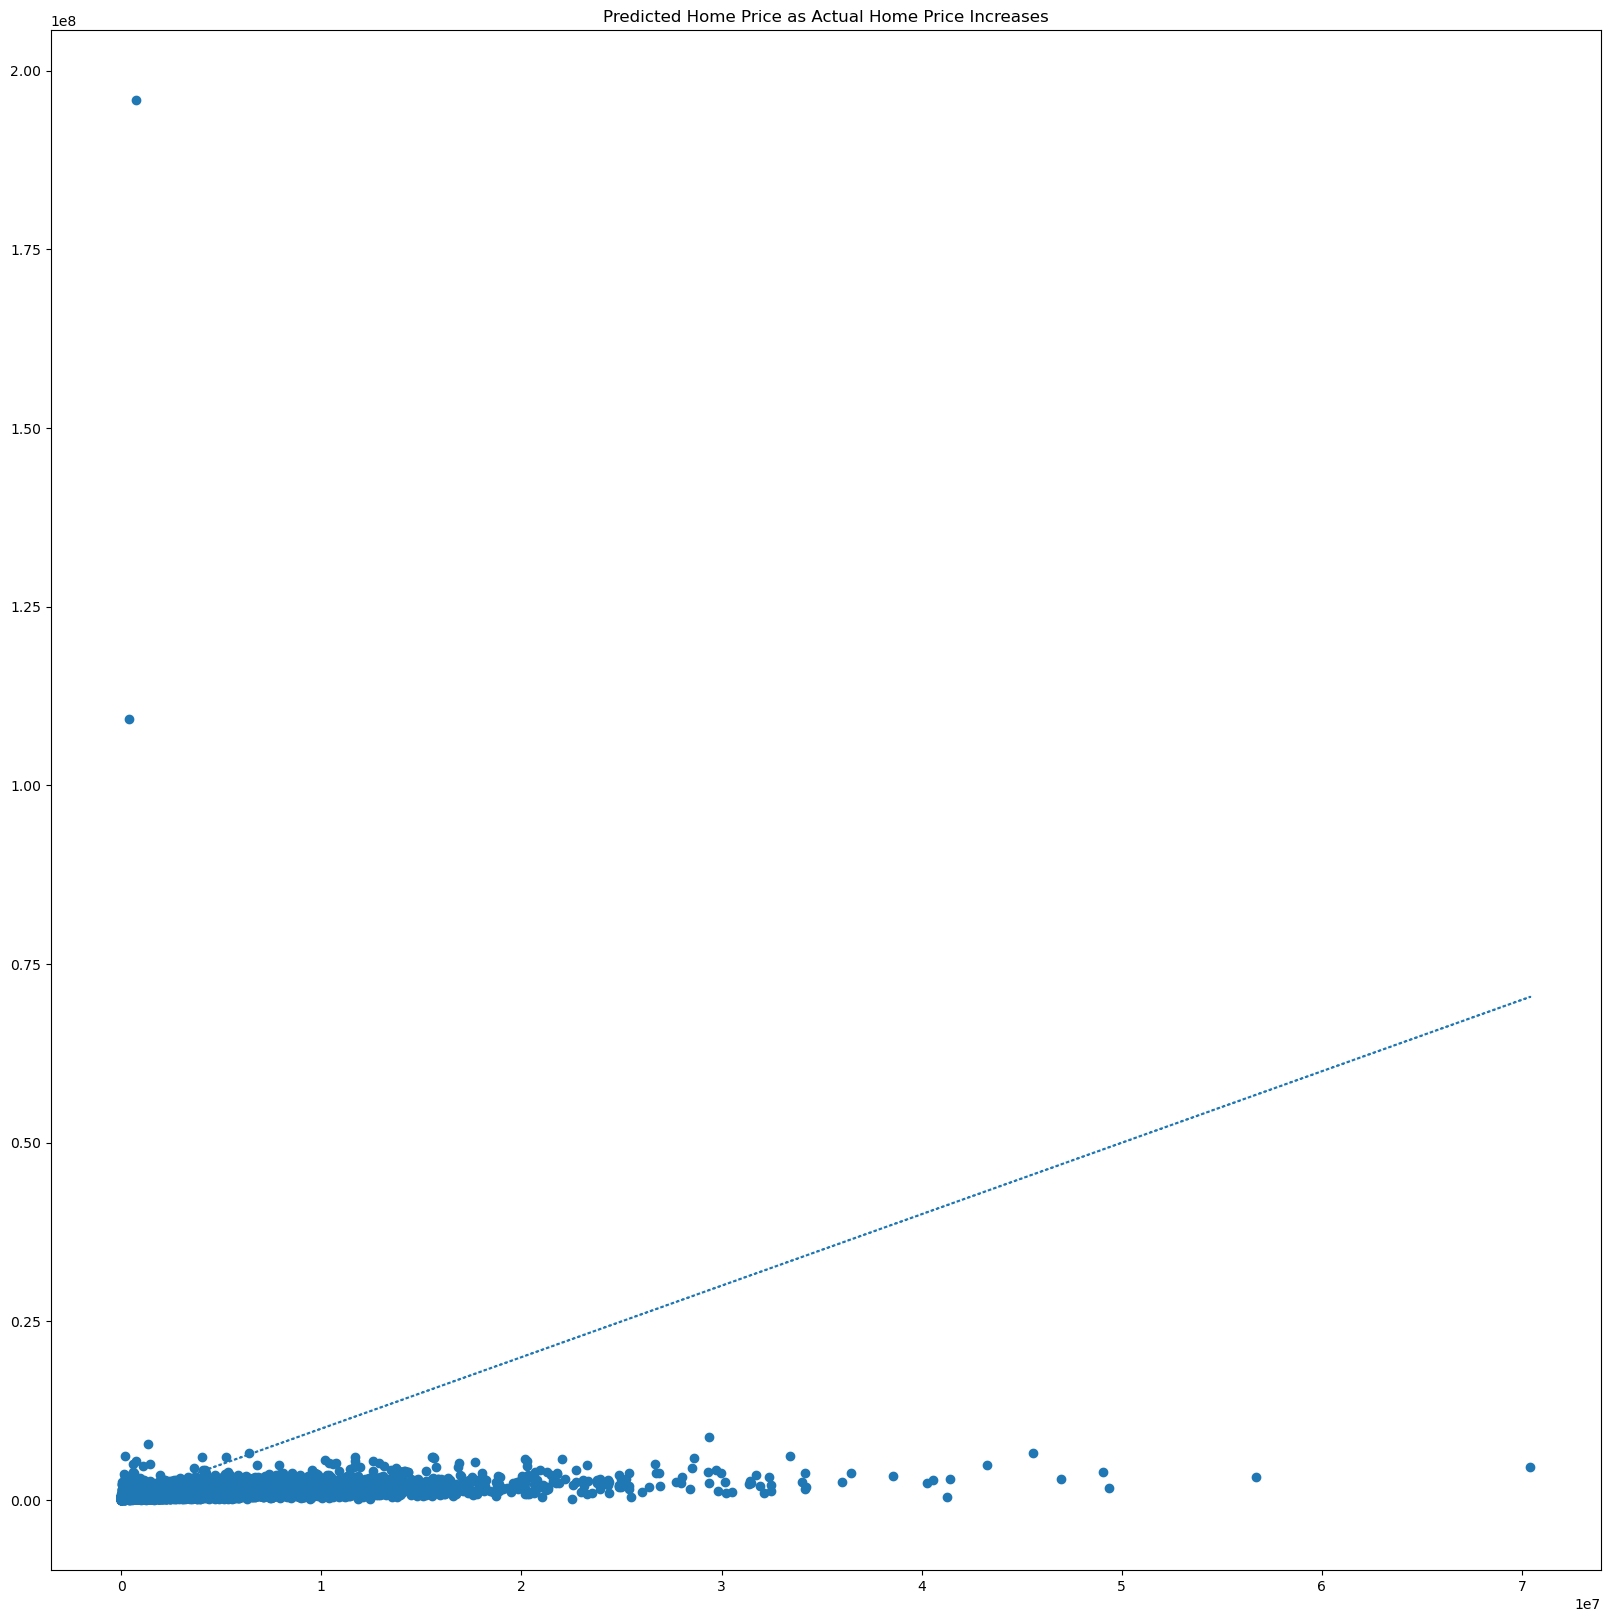

In [28]:
# plot residuals the first way
plt.figure(figsize=(20,20))
plt.scatter(y, yhat)
# x=x is y=y here, the cases where the vert axis matches the horiz axis
plt.plot(y,y, ls=':')
plt.title('Predicted Home Price as Actual Home Price Increases')
plt.show()

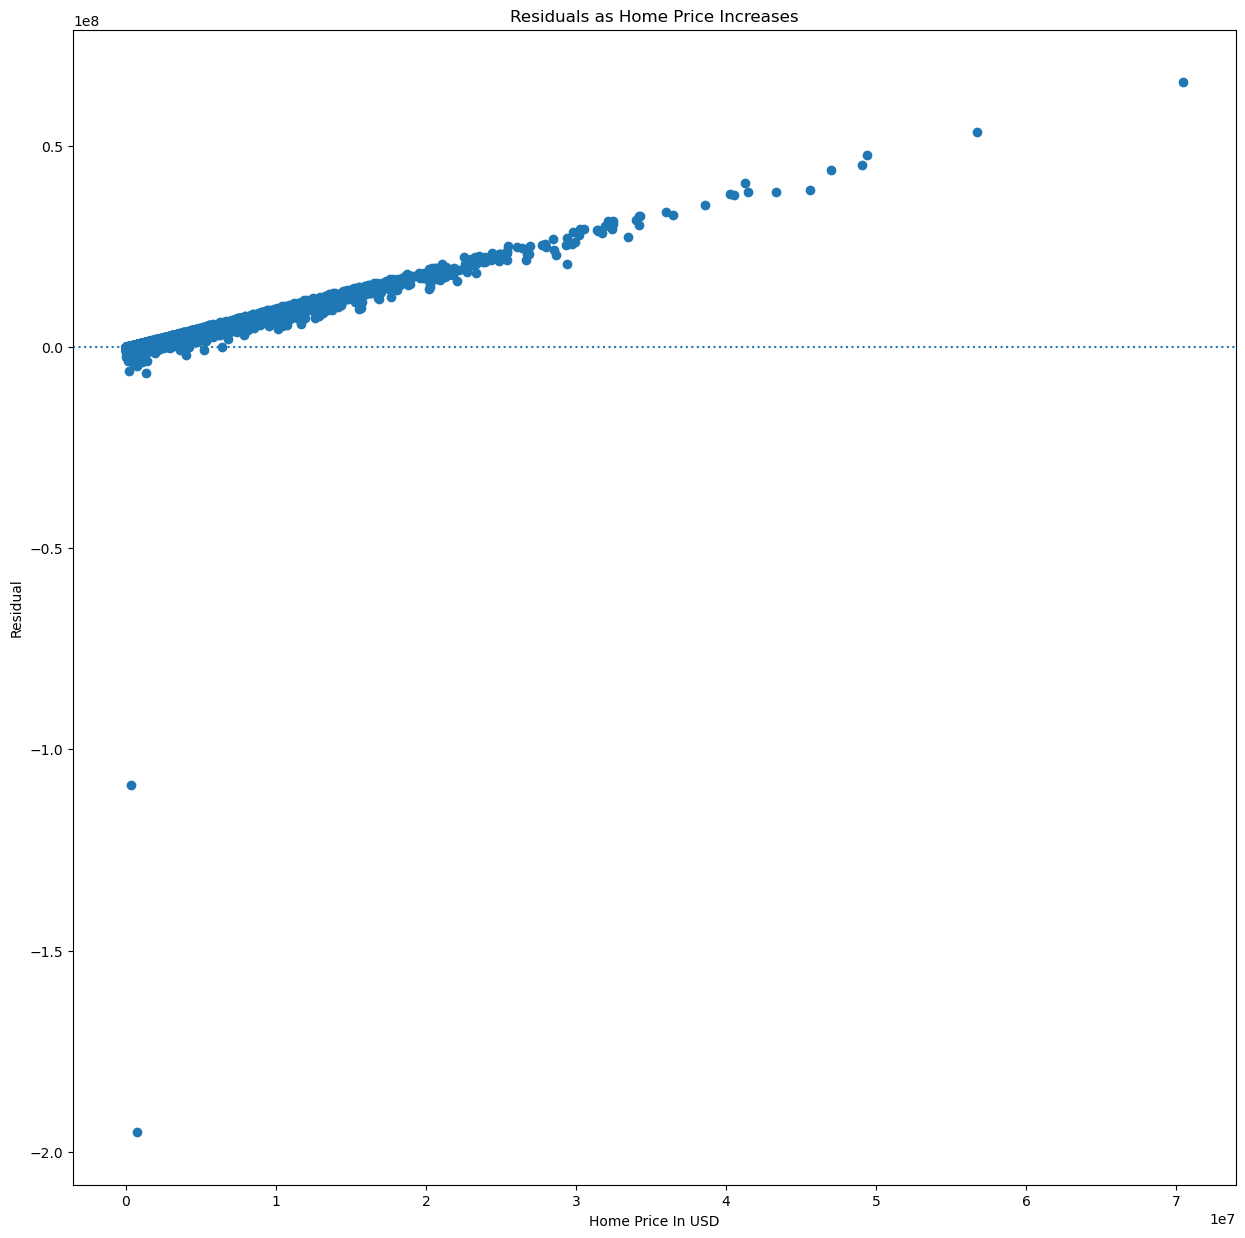

In [29]:
# plot them the other way
plt.figure(figsize=(15,15))
plt.scatter(y, (y-yhat))
plt.axhline(0,ls=':')
plt.title('Residuals as Home Price Increases')
plt.xlabel('Home Price In USD')
plt.ylabel('Residual')
plt.show()

In [ ]:
# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, 
# and root mean squared error.

In [30]:
mean_baseline = y.mean()
med_baseline = y.median()

In [31]:
y_pred = pd.DataFrame(
{
    'y_act': y.values,
    'yhat': yhat,
    'mean_baseline' : mean_baseline,
    'med_baseline': med_baseline
}, index=train.index)

In [32]:
# compute the error on these two baselines:
mean_baseline_rmse = mean_squared_error(y_pred.mean_baseline, y) ** (1/2)
med_baseline_rmse = mean_squared_error(y_pred.med_baseline, y) ** (1/2)

In [33]:
mean_baseline_rmse < med_baseline_rmse

True

In [34]:
#  mean provides our best baseline,
print(f'Root mean squared error for the mean value of home price is ${round(mean_baseline_rmse, 3)}.')

Root mean squared error for the mean value of home price is $665377.941.


In [ ]:
# Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model 
# (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [35]:
len(train)

1198531

In [36]:
train.shape[0]

1198531

In [37]:
# Squared Errors, 
# residuals squared
squared_errors = (y_pred['y_act'] - y_pred['yhat']) ** 2
# Sum of Squared Error, 
sse = squared_errors.sum()
# Mean Squared error, 
mse = sse / train.shape[0] #alternatively, len(train), y_pred.shape[0]
# Root mean Squared Error
# square root the mean squared error!
rmse = mse**0.5

In [38]:
rmse

601237.3378573689

In [ ]:
# Write python code that compares the sum of squared errors for your model against the sum of squared errors 
# for the baseline model and outputs whether or not your model performs better than the baseline model.

In [39]:
sse

4.332525802923578e+17

In [40]:
y_pred.columns

Index(['y_act', 'yhat', 'mean_baseline', 'med_baseline'], dtype='object')

In [41]:
# do that calculation again for our baseline
# Squared Errors, 
# residuals squared
squared_errors_bl = (y_pred['y_act'] - y_pred['mean_baseline']) ** 2
# Sum of Squared Error, 
sse_bl = squared_errors_bl.sum()

In [42]:
sse, sse_bl

(4.332525802923578e+17, 5.306229983729182e+17)

In [43]:
 sse_bl > sse

True

In [ ]:
# What is the amount of variance explained in your model?

In [44]:
# r^2 == ESS / TSS == ESS / (ESS + SSE)

In [45]:
# ESS = Δ(y_pred, y_mean)
ESS = ((y_pred['yhat'] - y_pred['mean_baseline']) ** 2).sum()

In [47]:
ESS

9.73704180806503e+16

In [48]:
sse

4.332525802923578e+17

In [49]:
ESS / (ESS + sse)

0.18350206903810554

In [50]:
# actual r_squared score
r2_score(y, y_pred['yhat'])

0.18350206903796717

In [ ]:
# Is your model better than the baseline model?

In [51]:
# lets compare the rmse of our model 
# to the rmse of our baseline

In [52]:
mean_baseline_rmse > mean_squared_error(y, y_pred['yhat'], squared=False)

True

In [53]:
mean_baseline_rmse

665377.9411719535

In [54]:
# we see that we have a reduction of error from our baseline to our 
# actual linear regression model.
# visualuzation of our residuals do not quite match up to a perfect
# idea of a regression, and we have significant amount of trend to capture

In [ ]:
# Create a file named evaluate.py that contains the following functions.

In [55]:
def plot_residuals(y, yhat):
    plt.figure(figsize=(15,15))
    plt.scatter(y, (y-yhat))
    plt.axhline(0,ls=':')
    plt.title('Residuals as Home Price Increases')
    plt.xlabel('Home Price In USD')
    plt.ylabel('Residual')
    plt.show()


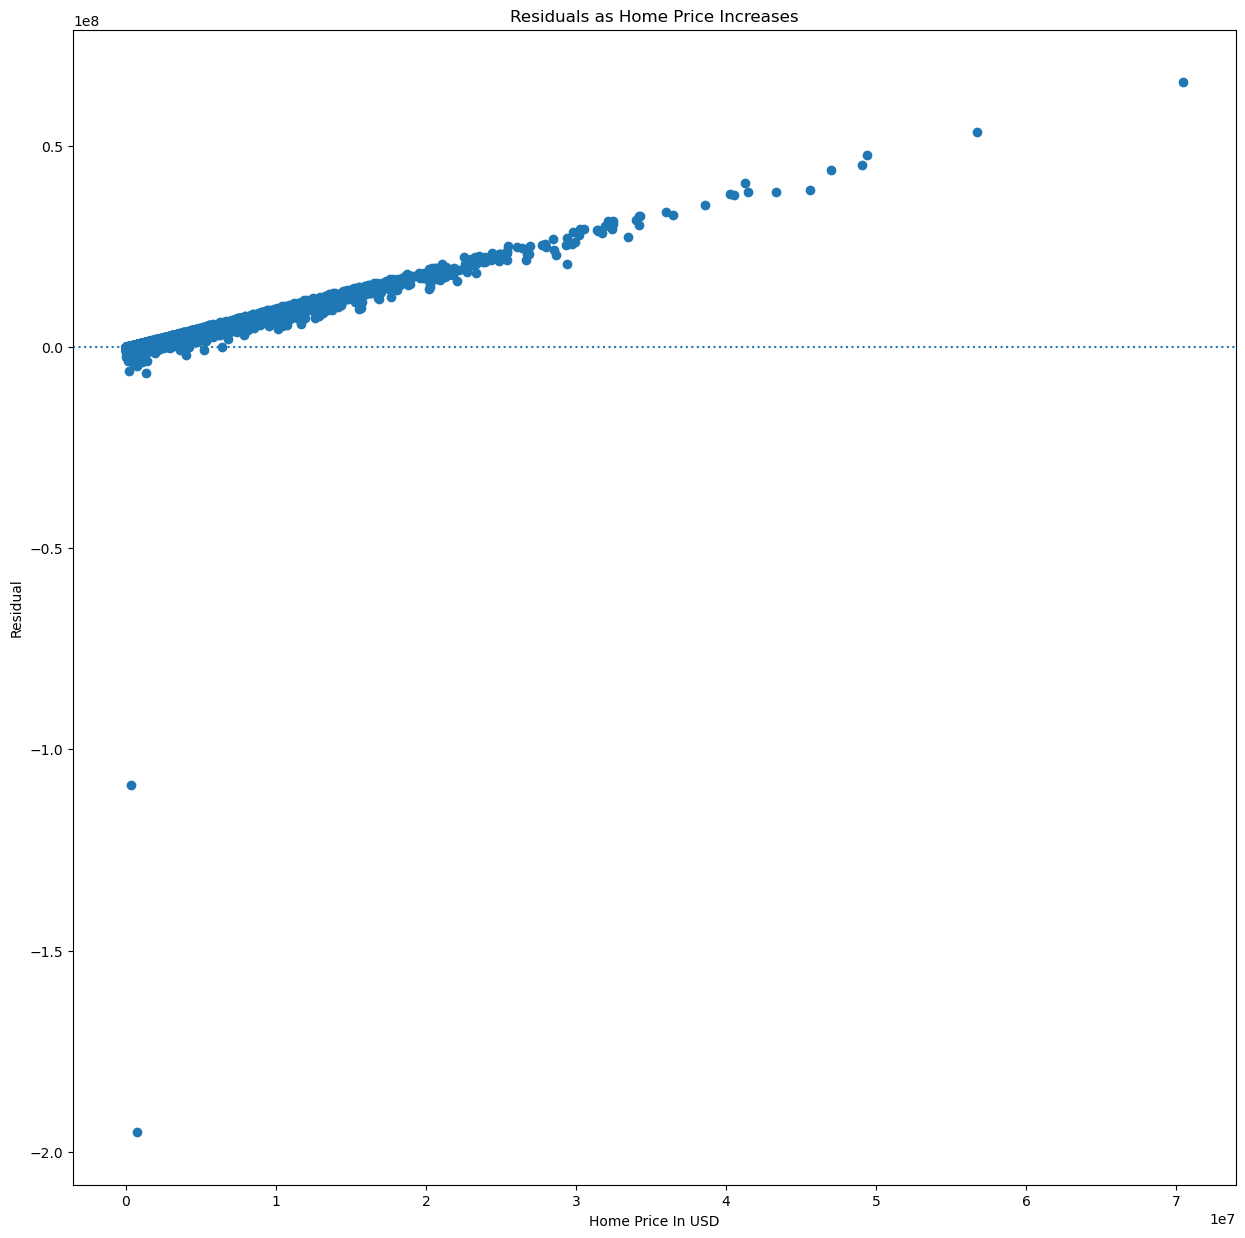

In [56]:
plot_residuals(y, yhat)

In [57]:
def regression_errors(y, yhat):
    preds = pd.DataFrame({
        'y': y,
        'yhat': yhat,
        'mean': y.mean()
    })
    
    squared_errors = (preds['y'] - preds['yhat']) ** 2
    # Sum of Squared Error, 
    sse = squared_errors.sum()
    mse = sse / len(preds)
    rmse = mse ** 0.5
    ess = ((preds['yhat'] - preds['mean']) **2).sum()
    tss = ess + sse
    return sse, ess, tss, mse, rmse

In [58]:
regression_errors(y, yhat)

(4.332525802923578e+17,
 9.73704180806503e+16,
 5.306229983730081e+17,
 361486336433.8159,
 601237.3378573689)

In [59]:
def baseline_mean_errors(y):
    preds = pd.DataFrame({
        'y': y,
        'mean': y.mean()
    })
    
    squared_errors_bl = (preds['y'] - preds['mean']) ** 2
    # Sum of Squared Error, 
    sse = squared_errors_bl.sum()
    mse = sse / len(preds)
    rmse = mse ** 0.5
    return sse, mse, rmse

In [60]:
baseline_mean_errors(y)

(5.306229983729182e+17, 442727804598.2275, 665377.9411719535)

In [61]:
def better_than_baseline(y, yhat):
    '''
    return a boolean for if the model beats the baseline prediction
    '''
    rmse_model = mean_squared_error(y, yhat, squared=False)
    sse, mse, rmse_baseline = baseline_mean_errors(y)
    return (rmse_model < rmse_baseline)

In [62]:
better_than_baseline(y, yhat)

True